<a href="https://colab.research.google.com/github/thiennguyen37-qn/bad-debt-prediction/blob/main/model_comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/thiennguyen37-qn/bad-debt-prediction/refs/heads/main/Datasets/Final%20dataset/model_df.csv')
df

,LaiSuat,TyLeBaoBam,NhuCauVon,PhanKyTraLai,ThanhPhanKinhTe,MaLoaiThue,custtpcdnm,LoaiHinhVay,TrangThaiHoTroLaiSuat,NganhKinhTe,NhomNo,DH-GN
0,13.0,0,550000000,0,"Kinh tế cá thể, tiểu chủ",1001.0,Cá nhân,Vay ngắn hạn (TK 211),Không hỗ trợ,Buôn bán,Nợ xấu,0.994521
1,13.0,100,3549000000,3,"Kinh tế cá thể, tiểu chủ",1001.0,Cá nhân,Vay ngắn hạn (TK 211),Không hỗ trợ,Buôn bán,Nợ xấu,0.495890
2,11.7,0,80000000,3,"Kinh tế cá thể, tiểu chủ",1001.0,Cá nhân,Vay trung hạn (TK 212),Không hỗ trợ,Mua sắm và sửa chữa tài sản,Nợ bình thường,5.002740
3,11.7,100,507000000,6,"Kinh tế cá thể, tiểu chủ",1001.0,Cá nhân,Vay trung hạn (TK 212),Không hỗ trợ,Mua sắm và sửa chữa tài sản,Nợ bình thường,5.000000
4,11.5,0,80000000,6,"Kinh tế cá thể, tiểu chủ",1001.0,Cá nhân,Vay trung hạn (TK 212),Không hỗ trợ,Mua sắm và sửa chữa tài sản,Nợ bình thường,5.002740
...,...,...,...,...,...,...,...,...,...,...,...,...
12844,9.2,0,100000000,0,"Kinh tế cá thể, tiểu chủ",1001.0,Cá nhân,Vay trung hạn (TK 212),Không hỗ trợ,Nông nghiệp,Nợ xấu,5.002740
12845,11.0,0,70000000,0,"Kinh tế cá thể, tiểu chủ",1001.0,Cá nhân,Vay trung hạn (TK 212),Không hỗ trợ,Mua sắm và sửa chữa tài sản,Nợ xấu,5.005479
12846,11.0,0,80000000,0,"Kinh tế cá thể, tiểu chủ",1001.0,Cá nhân,Vay trung hạn (TK 212),Không hỗ trợ,Nông nghiệp,Nợ xấu,3.002740
12847,11.0,100,400000000,0,"Kinh tế cá thể, tiểu chủ",1001.0,Cá nhân,Vay trung hạn (TK 212),Không hỗ trợ,Nông nghiệp,Nợ xấu,4.002740


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12849 entries, 0 to 12848
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   LaiSuat                12849 non-null  float64
 1   TyLeBaoBam             12849 non-null  int64  
 2   NhuCauVon              12849 non-null  int64  
 3   PhanKyTraLai           12849 non-null  int64  
 4   ThanhPhanKinhTe        12849 non-null  object 
 5   MaLoaiThue             12849 non-null  object 
 6   custtpcdnm             12849 non-null  object 
 7   LoaiHinhVay            12849 non-null  object 
 8   TrangThaiHoTroLaiSuat  12849 non-null  object 
 9   NganhKinhTe            12849 non-null  object 
 10  NhomNo                 12849 non-null  object 
 11  DH-GN                  12849 non-null  float64
dtypes: float64(2), int64(3), object(7)
memory usage: 1.2+ MB


In [4]:
# Bỏ bớt custtpcdnm
# Encode MaLoaiThue thành 1001 hoặc != 1001
# Xem stats DH-GN từ các giá trị trong LoaiHinhVay
# Binary encode TrangThaiHTLS
# Target encoding NganhKinhTe


In [5]:
df[['ThanhPhanKinhTe','custtpcdnm']].value_counts()

ThanhPhanKinhTe           custtpcdnm                   
Kinh tế cá thể, tiểu chủ  Cá nhân                          12557
Kinh tế tư bản tư nhân    Công ty TNHH 1 thành viên          122
Kinh tế tập thể           Công ty TNHH nhiều thành viên       68
                          Công ty cổ phần                     49
Kinh tế tư bản tư nhân    Doanh nghiệp tư nhân                41
Kinh tế tập thể           Hợp tác xã                          12
Name: count, dtype: int64

In [6]:
df['MaLoaiThue'].value_counts()

,count
MaLoaiThue,
1001.0,12474
unknown,205
3001.0,168
5012.0,2


In [7]:
df['LoaiHinhVay'].value_counts()

,count
LoaiHinhVay,
Vay trung hạn (TK 212),7414
Vay ngắn hạn (TK 211),4161
Thấu chi trên TK khách hàng,1071
CV từ NV của Ch/phủ(TrungHạn) (TK 252102),113
Vay dài hạn (TK 213),90


In [8]:
df[['LoaiHinhVay','DH-GN']].groupby('LoaiHinhVay').agg(['min','max','mean'])

DH-GN                      
                                                min        max       mean
LoaiHinhVay                                                              
CV từ NV của Ch/phủ(TrungHạn) (TK 252102)  2.000000   3.002740   2.144066
Thấu chi trên TK khách hàng                0.005479   1.000000   0.759595
Vay dài hạn (TK 213)                       7.005479  16.000000  13.560639
Vay ngắn hạn (TK 211)                      0.008219   3.249315   0.874225
Vay trung hạn (TK 212)                     0.630137   5.882192   2.528793

In [9]:
df[['TrangThaiHoTroLaiSuat','NhomNo']].value_counts()

TrangThaiHoTroLaiSuat  NhomNo        
Không hỗ trợ           Nợ bình thường    12393
                       Nợ xấu              410
Hỗ trợ                 Nợ bình thường       46
Name: count, dtype: int64

In [10]:
df['NganhKinhTe'].value_counts()

,count
NganhKinhTe,
Mua sắm và sửa chữa tài sản,3988
Nông nghiệp,3765
Buôn bán,3629
Ngành nghề khác,1111
Sản xuất và chế biến,136
Xây dựng,122
Vận tải,51
Dịch vụ ăn uống,47


In [11]:
df['MaLoaiThue_1001'] = df['MaLoaiThue'].apply(lambda x: "Yes" if x == "1001.0" else "No")
df['LoaiHinhVay'] = df['LoaiHinhVay'].apply(lambda x: 'Trung hạn' if (x == 'CV từ NV của Ch/phủ(TrungHạn) (TK 252102)') or (x == 'Vay trung hạn (TK 212)')
                                                 else 'Ngắn hạn' if (x == 'Vay ngắn hạn (TK 211)') or (x == 'Thấu chi trên TK khách hàng') else 'Dài hạn')
df = df.drop(columns = ['MaLoaiThue','custtpcdnm'])

In [12]:
df

,LaiSuat,TyLeBaoBam,NhuCauVon,PhanKyTraLai,ThanhPhanKinhTe,LoaiHinhVay,TrangThaiHoTroLaiSuat,NganhKinhTe,NhomNo,DH-GN,MaLoaiThue_1001
0,13.0,0,550000000,0,"Kinh tế cá thể, tiểu chủ",Ngắn hạn,Không hỗ trợ,Buôn bán,Nợ xấu,0.994521,Yes
1,13.0,100,3549000000,3,"Kinh tế cá thể, tiểu chủ",Ngắn hạn,Không hỗ trợ,Buôn bán,Nợ xấu,0.495890,Yes
2,11.7,0,80000000,3,"Kinh tế cá thể, tiểu chủ",Trung hạn,Không hỗ trợ,Mua sắm và sửa chữa tài sản,Nợ bình thường,5.002740,Yes
3,11.7,100,507000000,6,"Kinh tế cá thể, tiểu chủ",Trung hạn,Không hỗ trợ,Mua sắm và sửa chữa tài sản,Nợ bình thường,5.000000,Yes
4,11.5,0,80000000,6,"Kinh tế cá thể, tiểu chủ",Trung hạn,Không hỗ trợ,Mua sắm và sửa chữa tài sản,Nợ bình thường,5.002740,Yes
...,...,...,...,...,...,...,...,...,...,...,...
12844,9.2,0,100000000,0,"Kinh tế cá thể, tiểu chủ",Trung hạn,Không hỗ trợ,Nông nghiệp,Nợ xấu,5.002740,Yes
12845,11.0,0,70000000,0,"Kinh tế cá thể, tiểu chủ",Trung hạn,Không hỗ trợ,Mua sắm và sửa chữa tài sản,Nợ xấu,5.005479,Yes
12846,11.0,0,80000000,0,"Kinh tế cá thể, tiểu chủ",Trung hạn,Không hỗ trợ,Nông nghiệp,Nợ xấu,3.002740,Yes
12847,11.0,100,400000000,0,"Kinh tế cá thể, tiểu chủ",Trung hạn,Không hỗ trợ,Nông nghiệp,Nợ xấu,4.002740,Yes


In [13]:
X = df.drop(columns = ['NhomNo'])
y = df['NhomNo']

cat_cols = [col for col in X.columns if X[col].dtype == 'object']
cat_cols

['ThanhPhanKinhTe',
 'LoaiHinhVay',
 'TrangThaiHoTroLaiSuat',
 'NganhKinhTe',
 'MaLoaiThue_1001']

In [14]:
from scipy.stats import chi2_contingency

def chi_square_test(df, feature, target):
    contingency_table = pd.crosstab(df[feature], df[target])

    chi2, p, dof, expected = chi2_contingency(contingency_table)

    return {
        'feature': feature,
        'chi2_stat': chi2,
        'p_value': p,
        'dof': dof,
        'min_expected_freq': expected.min()
    }

results = []

for col in cat_cols:
    res = chi_square_test(df, col, 'NhomNo')
    results.append(res)

chi_square_df = pd.DataFrame(results)
chi_square_df.sort_values(by='p_value')

,feature,chi2_stat,p_value,dof,min_expected_freq
0,ThanhPhanKinhTe,1919.566195,0.000000e+00,2,4.116274
4,MaLoaiThue_1001,3611.592024,0.000000e+00,1,11.965912
3,NganhKinhTe,988.239685,4.184871e-209,7,1.499728
2,TrangThaiHoTroLaiSuat,0.661541,4.160164e-01,1,1.467819
1,LoaiHinhVay,1.683298,4.309992e-01,2,2.871819


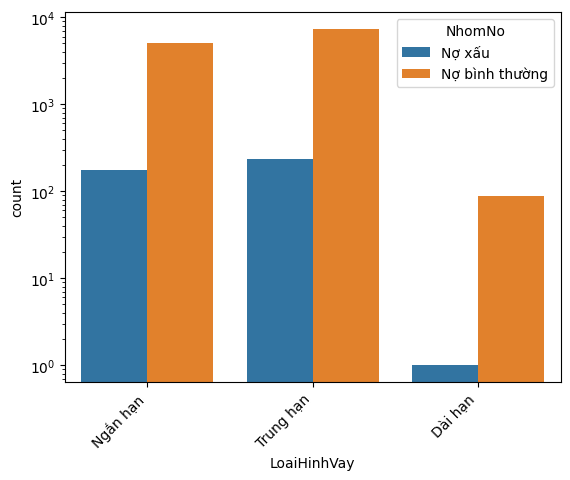

In [15]:
sns.countplot(x = 'LoaiHinhVay', data = df, hue = 'NhomNo')
plt.yscale('log')
plt.xticks(rotation = 45, ha = 'right')
plt.show()

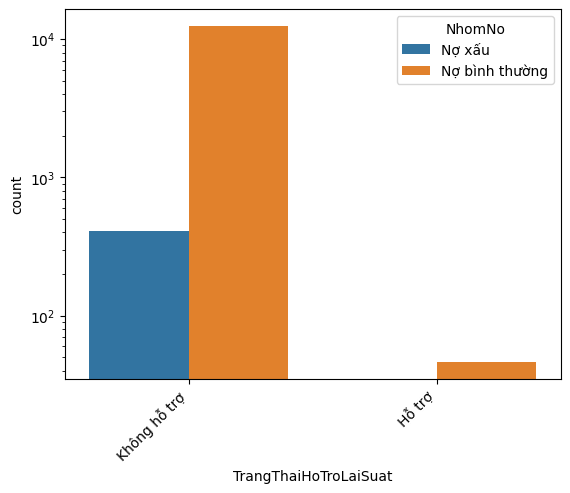

In [16]:
sns.countplot(x = 'TrangThaiHoTroLaiSuat', data = df, hue = 'NhomNo')
plt.yscale('log')
plt.xticks(rotation = 45, ha = 'right')
plt.show()

In [17]:
# Drop TTHTLS + LoaiHinhVay
# Gộp: KT CTTC và KT TBTN (theo các thành phần kinh tế tại VN)
# Gộp các nhóm ngành kinh tế

In [18]:
def map_nganh_kinh_te(x):
    if x in [
        'Mua sắm và sửa chữa tài sản',
        'Buôn bán',
        'Dịch vụ ăn uống'
    ]:
        return 'Thương mại - Dịch vụ'

    elif x in [
        'Sản xuất và chế biến',
        'Xây dựng',
        'Vận tải'
    ]:
        return 'Sản xuất - Xây dựng - Vận tải'

    elif x == 'Nông nghiệp':
        return 'Nông nghiệp'

    elif x == 'Ngành nghề khác':
        return 'Khác'

    else:
        return 'Khác'

df1 = df.copy()
df1['ThanhPhanKinhTe'] = df1['ThanhPhanKinhTe'].apply(lambda x: x if x == 'Kinh tế tập thể' else 'Kinh tế tư nhân')
df1['NganhKinhTe'] = df1['NganhKinhTe'].apply(map_nganh_kinh_te)
df1 = df1.drop(columns = ['TrangThaiHoTroLaiSuat','LoaiHinhVay'])
df1

,LaiSuat,TyLeBaoBam,NhuCauVon,PhanKyTraLai,ThanhPhanKinhTe,NganhKinhTe,NhomNo,DH-GN,MaLoaiThue_1001
0,13.0,0,550000000,0,Kinh tế tư nhân,Thương mại - Dịch vụ,Nợ xấu,0.994521,Yes
1,13.0,100,3549000000,3,Kinh tế tư nhân,Thương mại - Dịch vụ,Nợ xấu,0.495890,Yes
2,11.7,0,80000000,3,Kinh tế tư nhân,Thương mại - Dịch vụ,Nợ bình thường,5.002740,Yes
3,11.7,100,507000000,6,Kinh tế tư nhân,Thương mại - Dịch vụ,Nợ bình thường,5.000000,Yes
4,11.5,0,80000000,6,Kinh tế tư nhân,Thương mại - Dịch vụ,Nợ bình thường,5.002740,Yes
...,...,...,...,...,...,...,...,...,...
12844,9.2,0,100000000,0,Kinh tế tư nhân,Nông nghiệp,Nợ xấu,5.002740,Yes
12845,11.0,0,70000000,0,Kinh tế tư nhân,Thương mại - Dịch vụ,Nợ xấu,5.005479,Yes
12846,11.0,0,80000000,0,Kinh tế tư nhân,Nông nghiệp,Nợ xấu,3.002740,Yes
12847,11.0,100,400000000,0,Kinh tế tư nhân,Nông nghiệp,Nợ xấu,4.002740,Yes


In [19]:
results = []

for col in ['ThanhPhanKinhTe','NganhKinhTe']:
    res = chi_square_test(df1, col, 'NhomNo')
    results.append(res)

chi_square_df1 = pd.DataFrame(results)
chi_square_df1.sort_values(by='p_value')

,feature,chi2_stat,p_value,dof,min_expected_freq
0,ThanhPhanKinhTe,1402.547904,5.871708e-307,1,4.116274
1,NganhKinhTe,886.580337,7.207988e-192,3,9.859911


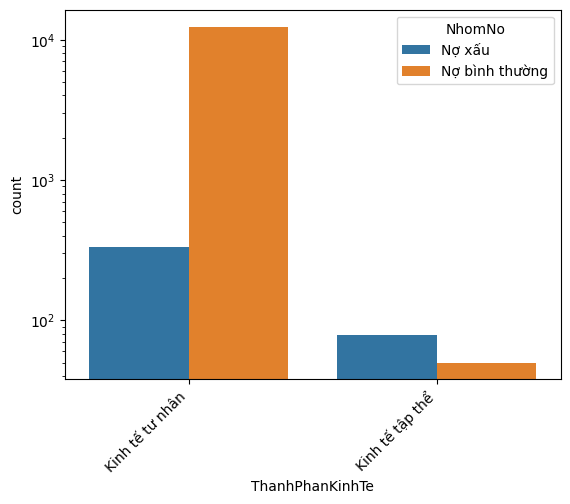

In [20]:
sns.countplot(x = 'ThanhPhanKinhTe', data = df1, hue = 'NhomNo')
plt.yscale('log')
plt.xticks(rotation = 45, ha = 'right')
plt.show()

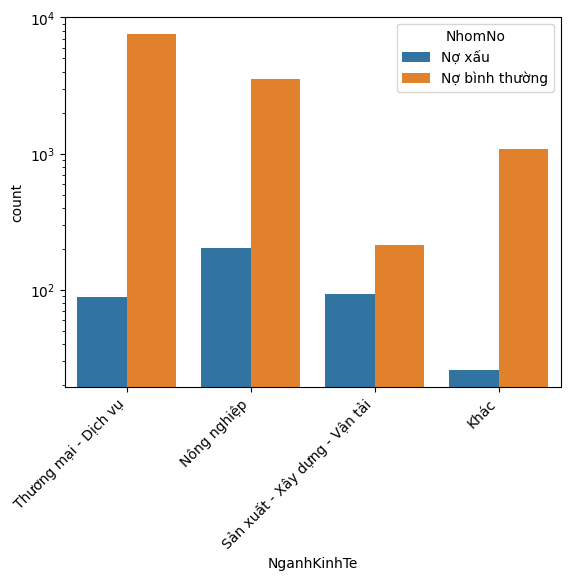

In [21]:
sns.countplot(x = 'NganhKinhTe', data = df1, hue = 'NhomNo')
plt.yscale('log')
plt.xticks(rotation = 45, ha = 'right')
plt.show()

In [22]:
df1['NhomNo'] = df1['NhomNo'].map({
    'Nợ bình thường': 0,
    'Nợ xấu': 1
})
df1

,LaiSuat,TyLeBaoBam,NhuCauVon,PhanKyTraLai,ThanhPhanKinhTe,NganhKinhTe,NhomNo,DH-GN,MaLoaiThue_1001
0,13.0,0,550000000,0,Kinh tế tư nhân,Thương mại - Dịch vụ,1,0.994521,Yes
1,13.0,100,3549000000,3,Kinh tế tư nhân,Thương mại - Dịch vụ,1,0.495890,Yes
2,11.7,0,80000000,3,Kinh tế tư nhân,Thương mại - Dịch vụ,0,5.002740,Yes
3,11.7,100,507000000,6,Kinh tế tư nhân,Thương mại - Dịch vụ,0,5.000000,Yes
4,11.5,0,80000000,6,Kinh tế tư nhân,Thương mại - Dịch vụ,0,5.002740,Yes
...,...,...,...,...,...,...,...,...,...
12844,9.2,0,100000000,0,Kinh tế tư nhân,Nông nghiệp,1,5.002740,Yes
12845,11.0,0,70000000,0,Kinh tế tư nhân,Thương mại - Dịch vụ,1,5.005479,Yes
12846,11.0,0,80000000,0,Kinh tế tư nhân,Nông nghiệp,1,3.002740,Yes
12847,11.0,100,400000000,0,Kinh tế tư nhân,Nông nghiệp,1,4.002740,Yes


In [23]:
from sklearn.model_selection import train_test_split, KFold

def train_model():
  X = df1.drop(columns=['NhomNo'])
  y = df1['NhomNo']
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
  cat_cols = [col for col in X.columns if X[col].dtype == 'object']



  def kfold_target_encoding(X_train, y_train, X_test, col, n_splits=5, m=50, random_state=42):
    """
    X_train, X_test: DataFrame
    y_train: Series (binary target)
    col: column name to encode
    """

    global_mean = y_train.mean()
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)

    X_train_encoded = pd.Series(index=X_train.index, dtype=float)

    # Encode train using K-Fold
    for train_idx, val_idx in kf.split(X_train):
        X_tr, X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_tr = y_train.iloc[train_idx]

        stats = y_tr.groupby(X_tr[col]).agg(['mean', 'count'])

        te_map = (
            (stats['count'] * stats['mean'] + m * global_mean) /
            (stats['count'] + m)
        )

        X_train_encoded.iloc[val_idx] = X_val[col].map(te_map)

    # Fill unseen categories in train
    X_train_encoded.fillna(global_mean, inplace=True)

    # Encode test using FULL train
    stats_full = y_train.groupby(X_train[col]).agg(['mean', 'count'])

    te_map_full = (
        (stats_full['count'] * stats_full['mean'] + m * global_mean) /
        (stats_full['count'] + m)
    )

    X_test_encoded = X_test[col].map(te_map_full)
    X_test_encoded.fillna(global_mean, inplace=True)

    return X_train_encoded, X_test_encoded

  for col in cat_cols:
    X_train[col + '_te'], X_test[col + '_te'] = kfold_target_encoding(X_train, y_train, X_test, col, n_splits=5, m=50)
  X_train.drop(columns=cat_cols, inplace=True)
  X_test.drop(columns=cat_cols, inplace=True)
  return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_model()

In [24]:
X_train

,LaiSuat,TyLeBaoBam,NhuCauVon,PhanKyTraLai,DH-GN,ThanhPhanKinhTe_te,NganhKinhTe_te,MaLoaiThue_1001_te
56,10.0,0,70000000,12,3.00274,0.027415,0.012651,0.015903
3412,9.0,0,150000000,3,2.00274,0.023607,0.011724,0.014128
7853,0.0,0,160000000,0,0.09589,0.026996,0.026519,0.016181
2855,8.2,100,1085000000,3,1.00000,0.027415,0.012651,0.015903
9475,10.2,100,320000000,3,2.00274,0.026996,0.051010,0.016181
...,...,...,...,...,...,...,...,...
11964,10.5,0,60000000,1,3.00274,0.027415,0.052173,0.015903
5191,18.2,0,40000000,6,1.00274,0.023082,0.010943,0.013736
5390,18.5,0,80000000,12,2.00274,0.026996,0.051010,0.016181
860,9.0,0,90000000,3,2.00000,0.027415,0.052173,0.015903


In [25]:
y_train.value_counts()

,count
NhomNo,
0,8708
1,286


In [26]:
X_test

,LaiSuat,TyLeBaoBam,NhuCauVon,PhanKyTraLai,DH-GN,ThanhPhanKinhTe_te,NganhKinhTe_te,MaLoaiThue_1001_te
11661,10.3,100,600000000,2,3.000000,0.025303,0.049064,0.015222
8,10.2,100,305000000,6,5.005479,0.025303,0.011979,0.015222
8484,7.9,100,880000000,3,1.000000,0.025303,0.011979,0.015222
6076,9.3,0,200000000,3,3.002740,0.025303,0.049064,0.015222
3851,10.2,100,130000000,3,3.002740,0.025303,0.011979,0.015222
...,...,...,...,...,...,...,...,...
7879,10.2,100,400000000,3,2.917808,0.025303,0.049064,0.015222
12786,10.0,0,150000000,0,3.002740,0.025303,0.049064,0.015222
12601,13.0,0,856164650,0,1.002740,0.450287,0.266875,0.489277
447,9.3,0,60000000,3,3.002740,0.025303,0.049064,0.015222


In [27]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

models = [
      RandomForestClassifier(random_state = 42),
      LogisticRegression(random_state = 42),
      KNeighborsClassifier(),
  ]

In [28]:
def find_best_strategies():

  def grid_search(model, param_grid, X_train, y_train):
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('smote', SMOTE(random_state=42)),
        ('model', model)
    ])
    grid = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1_macro')
    grid.fit(X_train, y_train)
    return grid

  param_grid_rf = {
      'smote__sampling_strategy': [0.05, 0.1, 0.2],
      'model__bootstrap': [True, False],
      'model__criterion': ['gini', 'entropy'],
      'model__max_depth': [4, 6],
      'model__min_samples_split': [50, 100, 200]
  }

  param_grid_lr = {
      'smote__sampling_strategy': [0.05, 0.1, 0.2],
      'model__C': [0.01, 0.1, 1],
      'model__solver': ["lbfgs", "liblinear"],
  }

  param_grid_knn = {
      'smote__sampling_strategy': [0.05, 0.1, 0.2],
      "model__weights": ["uniform", "distance"],
      "model__metric": ["euclidean", "manhattan", "cosine"]
  }


  best_param_rf = grid_search(models[0], param_grid_rf, X_train, y_train).best_params_
  best_param_lr = grid_search(models[1], param_grid_lr, X_train, y_train).best_params_
  best_param_knn = grid_search(models[2], param_grid_knn, X_train, y_train).best_params_

  return best_param_rf, best_param_lr, best_param_knn

best_param_rf, best_param_lr, best_param_knn = find_best_strategies()
print(best_param_rf)
print(best_param_lr)
print(best_param_knn)

{'model__bootstrap': True, 'model__criterion': 'gini', 'model__max_depth': 6, 'model__min_samples_split': 50, 'smote__sampling_strategy': 0.1}
{'model__C': 0.01, 'model__solver': 'lbfgs', 'smote__sampling_strategy': 0.05}
{'model__metric': 'manhattan', 'model__weights': 'distance', 'smote__sampling_strategy': 0.05}



===== Random Forest =====
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3731
           1       0.78      0.82      0.80       124

    accuracy                           0.99      3855
   macro avg       0.89      0.91      0.90      3855
weighted avg       0.99      0.99      0.99      3855



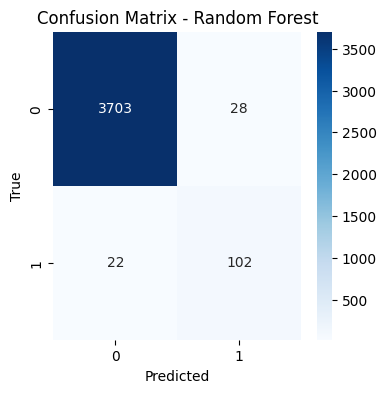

In [29]:
def train_and_evaluate(model, best_params, X_train, y_train, X_test, y_test, model_name):

    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('smote', SMOTE(random_state=42)),
        ('model', model)
    ])

    # set best params
    pipeline.set_params(**best_params)

    # fit
    pipeline.fit(X_train, y_train)

    # predict
    y_pred = pipeline.predict(X_test)

    # classification report
    print(f"\n===== {model_name} =====")
    print(classification_report(y_test, y_pred))

    # confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(4, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

train_and_evaluate(models[0], best_param_rf, X_train, y_train, X_test, y_test, "Random Forest")


===== Logistic Regression =====
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3731
           1       0.83      0.48      0.61       124

    accuracy                           0.98      3855
   macro avg       0.91      0.74      0.80      3855
weighted avg       0.98      0.98      0.98      3855



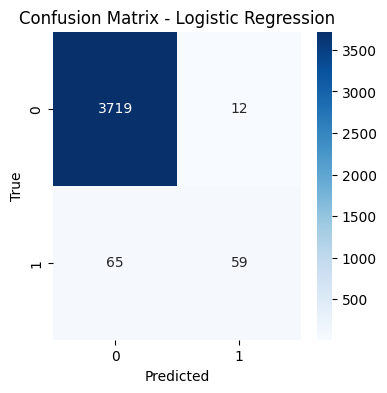


===== KNN =====
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3731
           1       0.76      0.73      0.74       124

    accuracy                           0.98      3855
   macro avg       0.88      0.86      0.87      3855
weighted avg       0.98      0.98      0.98      3855



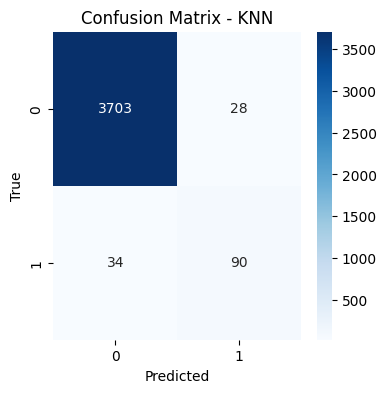

In [30]:
train_and_evaluate(models[1], best_param_lr, X_train, y_train, X_test, y_test, "Logistic Regression")
train_and_evaluate(models[2], best_param_knn, X_train, y_train, X_test, y_test, "KNN")